___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Ingest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
target = 'Exited'
df[target].head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [9]:
df.shape

(10000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [12]:
#plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

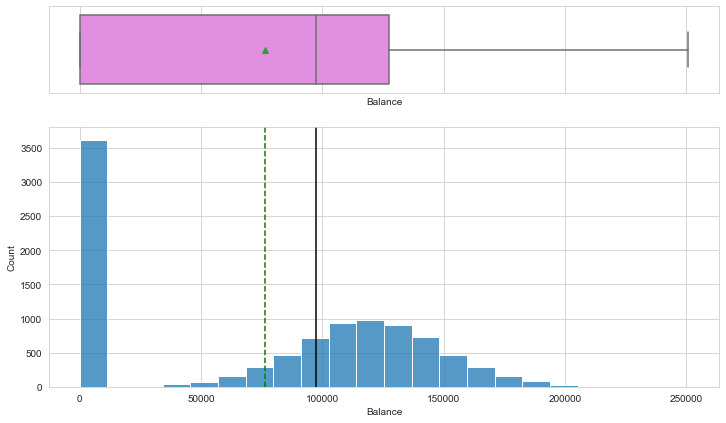

In [13]:
histogram_boxplot(df, 'Balance')

<AxesSubplot:xlabel='Exited', ylabel='count'>

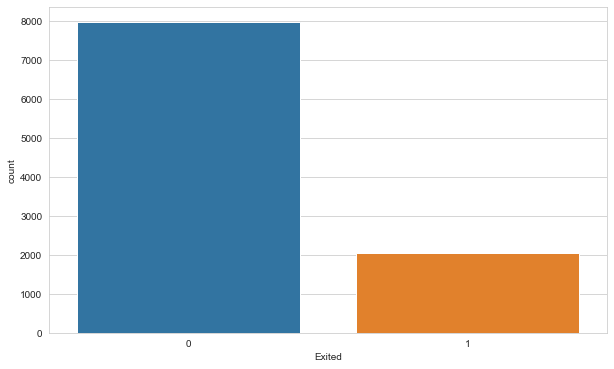

In [14]:
sns.countplot(df[target])

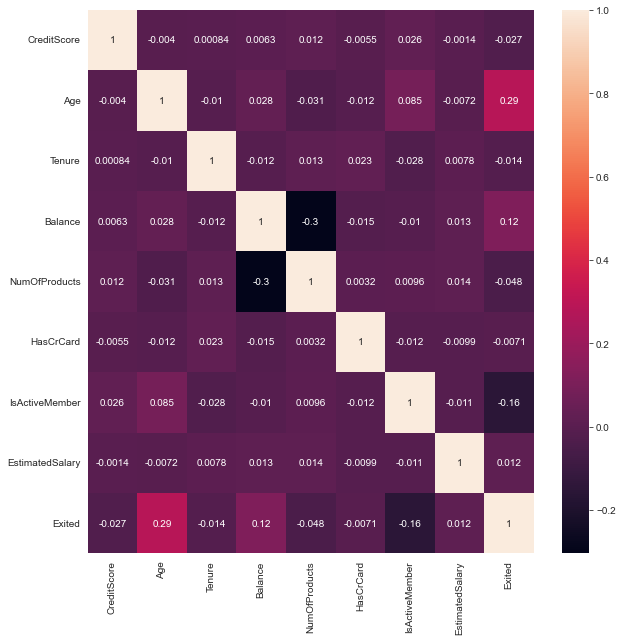

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

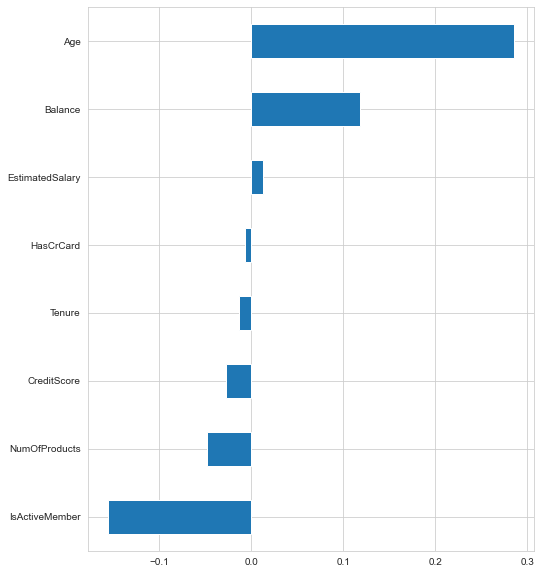

In [17]:
plt.figure(figsize = (8,10))
df.corr()[target].sort_values().drop(target).plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [18]:
df=pd.get_dummies(df,drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
X = df.drop(target, axis=1)
y = df[target].values

In [21]:
seed = 42

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [26]:
tf.__version__

'2.8.0'

In [27]:
X_train.shape

(9000, 11)

In [28]:
X_test.shape

(1000, 11)

### Creating Model

### without class_weigth

In [30]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [31]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7958 - val_loss: 0.4617 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7998 - val_loss: 0.4301 - val_accuracy: 0.8200
Epoch 3/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8120 - val_loss: 0.4050 - val_accuracy: 0.8389
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8170 - val_loss: 0.3948 - val_accuracy: 0.8444
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8214 - val_loss: 0.3823 - val_accuracy: 0.8489
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8242 - val_loss: 0.3672 - val_accuracy: 0.8556
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8294 - val_loss: 0.3557 - val_accuracy:

#### Evaluate

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.500,0.796,0.462,0.799
1,0.462,0.800,0.430,0.820
2,0.438,0.812,0.405,0.839
3,0.426,0.817,0.395,0.844
4,0.417,0.821,0.382,0.849


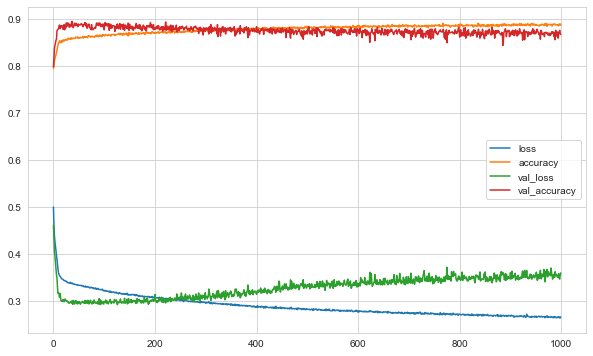

In [34]:
loss_df.plot();

In [35]:
#dene> verbose 0, 1, ve 2
model.evaluate(X_test, y_test, verbose=0)

[0.4383945167064667, 0.828000009059906]

In [36]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4383945167064667
accuracy :  0.828000009059906


In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[725  71]
 [101 103]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       796
           1       0.59      0.50      0.54       204

    accuracy                           0.83      1000
   macro avg       0.73      0.71      0.72      1000
weighted avg       0.82      0.83      0.82      1000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

ref: https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [68]:
weights = {0: 1.,
           1: 4.}

In [69]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1, class_weight=weights)

Epoch 1/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.8417 - val_loss: 0.5334 - val_accuracy: 0.7778
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8385 - val_loss: 0.5195 - val_accuracy: 0.7956
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8405 - val_loss: 0.5338 - val_accuracy: 0.7878
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.8368 - val_loss: 0.5217 - val_accuracy: 0.7922
Epoch 5/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.8422 - val_loss: 0.5161 - val_accuracy: 0.7944
Epoch 6/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8416 - val_loss: 0.4897 - val_accuracy: 0.8056
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.8437 - val_loss: 0.5024 - val_accuracy: 0.8044

#### Evaluate

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                360       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.547,0.842,0.533,0.778
1,0.544,0.839,0.519,0.796
2,0.541,0.840,0.534,0.788
3,0.543,0.837,0.522,0.792
4,0.538,0.842,0.516,0.794


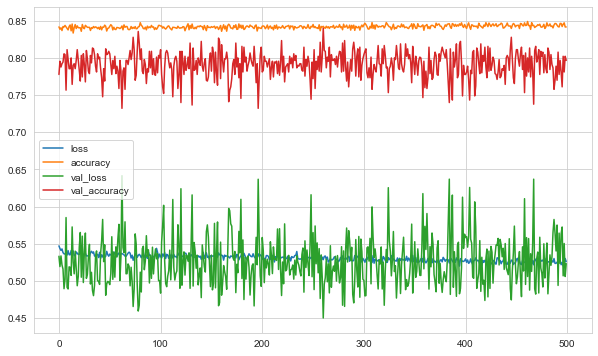

In [72]:
loss_df.plot();

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.557369589805603
accuracy :  0.7730000019073486


In [74]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 162]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.46      0.68      0.55       204

    accuracy                           0.77      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.82      0.77      0.79      1000



## GridSearchCV

In [75]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [81]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [82]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [83]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by='rank_test_score')
grid_result

#### Evaluate

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

## Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn.h5')

### Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_ = load_model('model_churn.h5')
scaler_ = pickle.load(open("scaler_churn", "rb"))

In [ ]:
single_cust = df.drop(target, axis = 1).iloc[0:1, :]
single_cust

In [ ]:
single_patient = scaler_.transform(single_cust)
single_cust

In [ ]:
(model_.predict(single_cust) > 0.5).astype("int32")

In [ ]:
df[target].iloc[0]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___